In [58]:
import numpy as np
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt


import numpy as np
pp.rcParams.update({'font.size': 14})
pp.rcParams['figure.figsize'] = [10, 5]

from matplotlib import animation, rc
from IPython.display import HTML

Text(0.5, 0, '$z$')

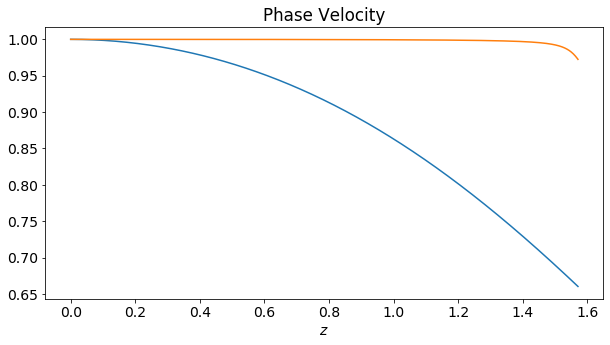

In [59]:
z=np.linspace(1e-8,np.pi/2,1000);
lam = 0.45;
pp.plot(z,1/(lam*z)*np.arcsin(lam*np.sin(z)))
lam = 0.999;
pp.plot(z,1/(lam*z)*np.arcsin(lam*np.sin(z)))
pp.title("Phase Velocity")
pp.xlabel("$z$")

Text(0.5, 0, '$\\bar k$')

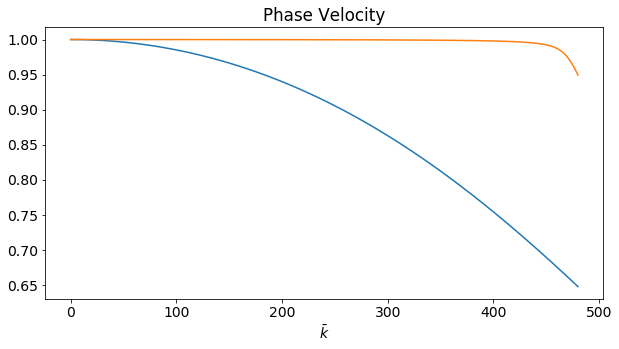

In [52]:
kbar =np.linspace(1e-8,480,1000);
lam = 0.45;
h=1/150.;
pp.plot(kbar,1/(lam*(kbar*h/2))*np.arcsin(lam*np.sin(kbar*h/2)))
lam = 0.999;
pp.plot(kbar,1/(lam*(kbar*h/2))*np.arcsin(lam*np.sin(kbar*h/2)))
pp.title("Phase Velocity")
pp.xlabel("$\\bar k$")

In [2]:
def wave_equation(u0,v0,N,M,T,c=1):
    from scipy import sparse
    k = T/M
    h = 1/(N+1)
    lam = c*k/h

    x = np.linspace(0,1,N+2)
    t = np.linspace(0,T,M+1)
        
    u = np.zeros((N+2,M+1))
    
    u[:,0] = u0(x)

    D = np.zeros((3,N))
    D[0,:] = 1
    D[1,:] = -2
    D[2,:] = 1
    D = sparse.spdiags(D,[-1,0,1],N,N)
    u[1:N+1,1] = u[1:N+1,0]+k*v0(x[1:N+1])+lam*lam/2*D*u[1:N+1,0]
    
    B = np.zeros((3,N))
    B[0,:] = lam*lam
    B[1,:] = 2*(1-lam*lam)
    B[2,:] = lam*lam

    B = sparse.spdiags(B,[1,0,-1],N,N)
    
    for k in range(2,M+1):
        u_pprev = u[1:N+1,k-2]
        u_prev = u[1:N+1,k-1]

        u_next = B.dot(u_prev) - u_pprev
        u[1:N+1,k] = u_next

        return (x,t,u)

In [14]:
gamma = 100*np.pi; kappa = 500;

u0 = lambda x,x0: np.exp(-kappa*(x-x0)**2)*np.sin(gamma*x); 
v0 = lambda x,x0: -np.exp(-kappa*(x-x0)**2)*(-kappa*2*(x-x0)*np.sin(gamma*x)+gamma*np.cos(gamma*x))

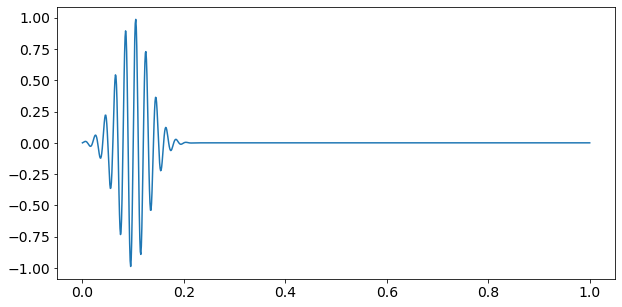

In [15]:
x=np.linspace(0,1,1000)
pp.plot(x,u0(x,x0=0.1))

N=500 M=716


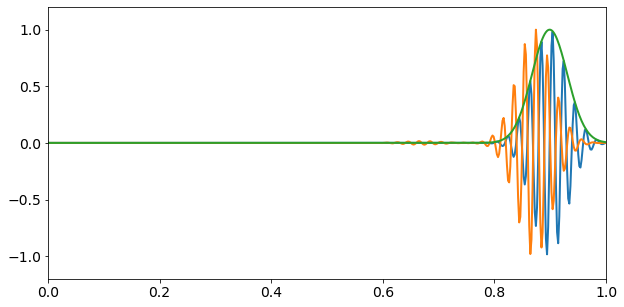

In [49]:
c=1
N=500
T=0.8
x0=0.1

u_exact = lambda x,t: u0(x-t,x0)
lam = 0.56

u_env = lambda x,t: np.exp(-kappa*(x-t-x0)**2)



h=1/(N+1)
M = int(np.ceil(T/h/lam))

print("N=%d M=%d" % (N,M) )

[x,t,u]=wave_equation(lambda x: u0(x,x0),lambda x: v0(x,x0),N,M,T,c=c)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-1.2, 1.2))
exact, = ax.plot([], [], lw=2)
solution, = ax.plot([], [], lw=2)
env, = ax.plot([], [], lw=2)



# initialization function: plot the background of each frame
def init():
    solution.set_data([], [])
    exact.set_data([], [])
    env.set_data([], [])
    return (exact,solution,env)

# animation function. This is called sequentially
def animate(i):
    solution.set_data(x, u[:,i])
    exact.set_data(x, u_exact(x,i*T/M))
    env.set_data(x, u_env(x,i*T/M))
    return (exact,solution,env)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=M, interval=10, blit=True)
HTML(anim.to_html5_video())

Phase veloctiy 0.988654
N=500 M=716


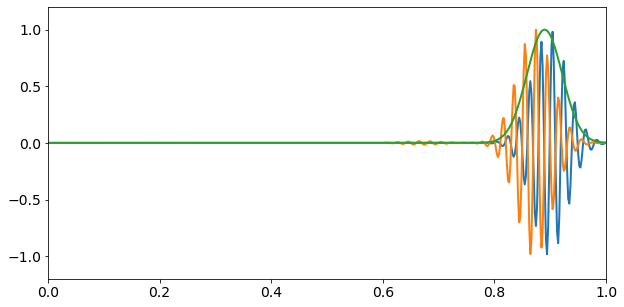

In [55]:
c=1
N=500
T=0.8
x0=0.1

u_exact = lambda x,t: u0(x-t,x0)
lam = 0.56

h=1/(N+1)
M = int(np.ceil(T/h/lam))

kbar = 100*np.pi;
vp = 1/(lam*(kbar*h/2))*np.arcsin(lam*np.sin(kbar*h/2))
print("Phase velocity %f" % vp)
u_env = lambda x,t: np.exp(-kappa*(x-vp*t-x0)**2)

print("N=%d M=%d" % (N,M) )

[x,t,u]=wave_equation(lambda x: u0(x,x0),lambda x: v0(x,x0),N,M,T,c=c)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-1.2, 1.2))
exact, = ax.plot([], [], lw=2)
solution, = ax.plot([], [], lw=2)
env, = ax.plot([], [], lw=2)



# initialization function: plot the background of each frame
def init():
    solution.set_data([], [])
    exact.set_data([], [])
    env.set_data([], [])
    return (exact,solution,env)

# animation function. This is called sequentially
def animate(i):
    solution.set_data(x, u[:,i])
    exact.set_data(x, u_exact(x,i*T/M))
    env.set_data(x, u_env(x,i*T/M))
    return (exact,solution,env)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=M, interval=10, blit=True)
HTML(anim.to_html5_video())

Text(0.5, 0, 'z')

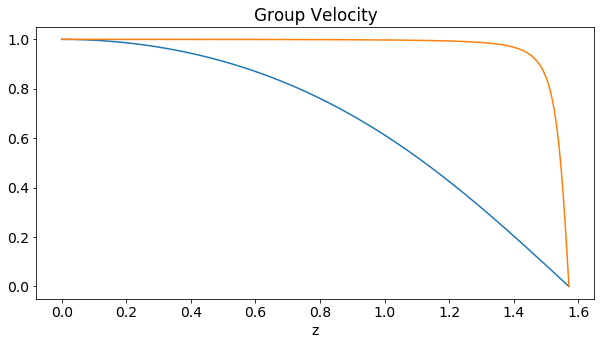

In [53]:
z=np.linspace(1e-8,np.pi/2,1000);
lam = 0.56;
pp.plot(z, np.cos(z)/np.sqrt(1-lam*lam*np.sin(z)**2))

lam = 0.999;
pp.plot(z, np.cos(z)/np.sqrt(1-lam*lam*np.sin(z)**2))
pp.title("Group Velocity")
pp.xlabel("z")

Text(0.5, 0, '$\\bar k$')

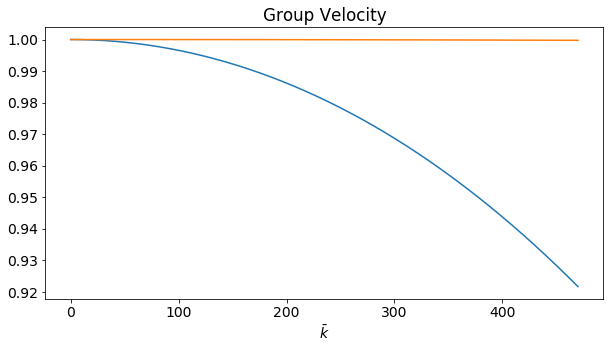

In [57]:
kbar =np.linspace(1e-8,470,1000);
lam = 0.56;
h=1/500.;

pp.plot(kbar, np.cos(kbar*h/2)/np.sqrt(1-lam*lam*np.sin(kbar*h/2)**2))

lam = 0.999;
pp.plot(kbar, np.cos(kbar*h/2)/np.sqrt(1-lam*lam*np.sin(kbar*h/2)**2))

pp.title("Group Velocity")
pp.xlabel("$\\bar k$")

Group velocity 0.965764
N=500 M=716


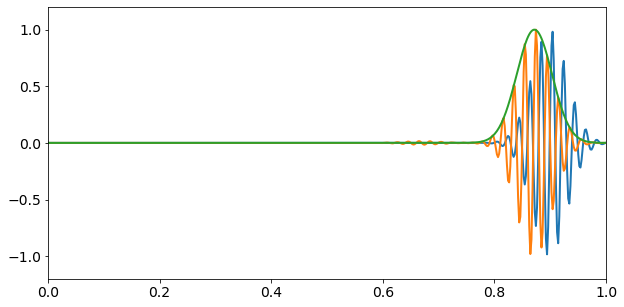

In [56]:
c=1
N=500
T=0.8
x0=0.1

u_exact = lambda x,t: u0(x-t,x0)
lam = 0.56
a=1




h=1/(N+1)
M = int(np.ceil(T/h/lam))

kbar = 100*np.pi;
vg = np.cos(kbar*h/2)/np.sqrt(1-lam*lam*np.sin(kbar*h/2)**2)
print("Group velocity %f" % vg)

u_env = lambda x,t: np.exp(-kappa*(x-vg*t-x0)**2)




print("N=%d M=%d" % (N,M) )

[x,t,u]=wave_equation(lambda x: u0(x,x0),lambda x: v0(x,x0),N,M,T,c=c)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-1.2, 1.2))
exact, = ax.plot([], [], lw=2)
solution, = ax.plot([], [], lw=2)
env, = ax.plot([], [], lw=2)



# initialization function: plot the background of each frame
def init():
    solution.set_data([], [])
    exact.set_data([], [])
    env.set_data([], [])
    return (exact,solution,env)

# animation function. This is called sequentially
def animate(i):
    solution.set_data(x, u[:,i])
    exact.set_data(x, u_exact(x,i*T/M))
    env.set_data(x, u_env(x,i*T/M))
    return (exact,solution,env)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=M, interval=10, blit=True)
HTML(anim.to_html5_video())